In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install textblob
from textblob import TextBlob
#Display settings
pd.set_option('display.max_columns', None)
#Load Dataset
df = pd.read_csv("C:/Users/Supritha/Downloads/studenteventfeedback.csv")
print("Dataset Loaded Successfully! \n")
df.head()

Dataset Loaded Successfully! 



,Student Name,Department,Event Name,Event Type,Event Rating,Would Attend Again,Liked Most,What Can Be Improved,Overall Feedback
0,Aarav,CE,Tech Fest,Guest Lecture,2,Yes,Fun activities,Add Q&A,Too technical for beginners.
1,Aarav,ME,AI Workshop,Guest Lecture,1,Yes,Nice presentation,Better examples,Really enjoyed the session!
2,Raj,CSE,Coding Bootcamp,Cultural,3,No,Easy to follow,More breaks,Loved the vibe!
3,Kunal,CE,Coding Bootcamp,Cultural,3,No,Helpful content,Clarity issues,Would attend again!
4,Ananya,CSE,Robotics Seminar,Guest Lecture,1,No,Great venue,Better examples,Would attend again!


In [10]:
# BASIC DATA EXPLORATION
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe(include='all')

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Student Name          500 non-null    object
 1   Department            500 non-null    object
 2   Event Name            500 non-null    object
 3   Event Type            500 non-null    object
 4   Event Rating          500 non-null    int64 
 5   Would Attend Again    500 non-null    object
 6   Liked Most            500 non-null    object
 7   What Can Be Improved  500 non-null    object
 8   Overall Feedback      500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB

Summary Statistics:

Missing Values:
Student Name            0
Department              0
Event Name              0
Event Type              0
Event Rating            0
Would Attend Again      0
Liked Most              0
What Can Be Improved    0
Overall Feedback        0
dtype: i

In [11]:
# Drop duplicates
df = df.drop_duplicates()

#Drop rows where feedback/concept is missing
text_columns = [col for col in df.columns if "comment" in col.lower() or "feedback" in col.lower()]
if len(text_columns) == 0:
    print(" No text columns detected. Please check dataset column names.")
else:
    text_col = text_columns[0]

df[text_col] = df[text_col].astype(str).str.strip()

# Remove rows with blank feedback
df = df[df[text_col].str.strip() != ""]

print("\nCleaned Dataset:")
df.head()


Cleaned Dataset:


,Student Name,Department,Event Name,Event Type,Event Rating,Would Attend Again,Liked Most,What Can Be Improved,Overall Feedback
0,Aarav,CE,Tech Fest,Guest Lecture,2,Yes,Fun activities,Add Q&A,Too technical for beginners.
1,Aarav,ME,AI Workshop,Guest Lecture,1,Yes,Nice presentation,Better examples,Really enjoyed the session!
2,Raj,CSE,Coding Bootcamp,Cultural,3,No,Easy to follow,More breaks,Loved the vibe!
3,Kunal,CE,Coding Bootcamp,Cultural,3,No,Helpful content,Clarity issues,Would attend again!
4,Ananya,CSE,Robotics Seminar,Guest Lecture,1,No,Great venue,Better examples,Would attend again!


In [12]:
# SENTIMENT ANALYSIS USING TEXTBLOB
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def classify_sentiment(score):
    if score > 0.2:
        return "positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

#Apply polarity    
df["sentiment_score"] = df[text_col].apply(get_polarity)

#Apply Classification
df["sentiment"] = df["sentiment_score"].apply(classify_sentiment)

print("\nSentiment Analysis Completed!")
df[["sentiment_score", "sentiment"]].head()


Sentiment Analysis Completed!


,sentiment_score,sentiment
0,0.000,Neutral
1,0.625,positive
2,0.875,positive
3,0.000,Neutral
4,0.000,Neutral


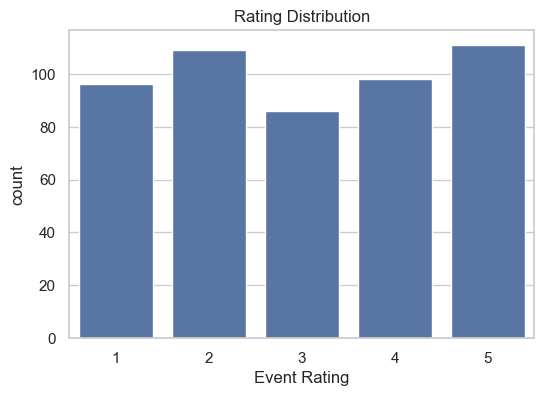

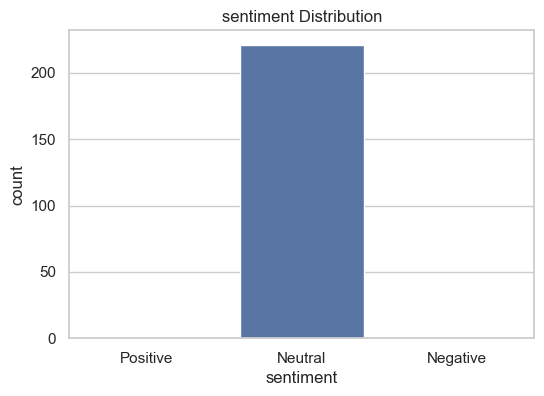

In [20]:
# VISUALIZATIONS
sns.set(style="whitegrid")

# Rating Distribution Chart
ratings_col = [col for col in df.columns if "rating" in col.lower()]

if len(ratings_col) > 0:
    ratings_col = ratings_col[0]
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[ratings_col])
    plt.title("Rating Distribution")
    plt.show()
else:
    print("No rating column found.")

# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["sentiment"], order=["Positive", "Neutral", "Negative"])
plt.title("sentiment Distribution")
plt.show()

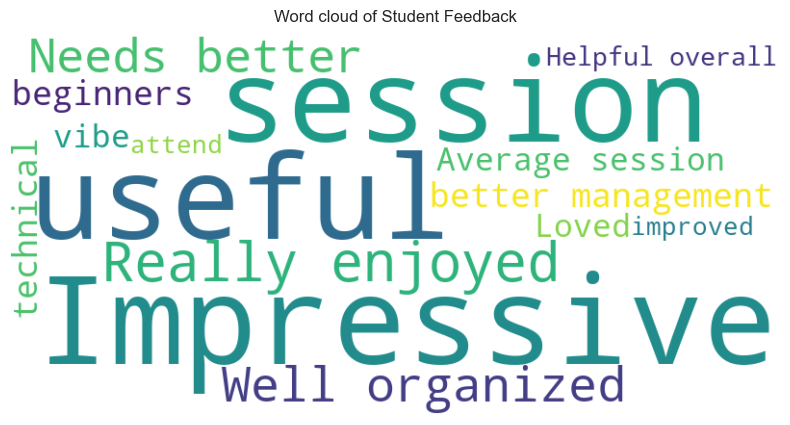

In [22]:
# Word Cloud
!pip install WordCloud
try:
    from wordcloud import WordCloud

    text_data = " ".join(df[text_col].tolist())

    wordcloud = WordCloud(width=800, height = 400, background_color='white').generate(text_data)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word cloud of Student Feedback")
    plt.show()
except:
    print("Wordcloud library not installed. Run: pip install wordcloud")

In [25]:
print("\n-------------------------- KEY INSIGHTS -----------------------\n")

print("Sentiment Breakdown:\n", df["sentiment"].value_counts())

if len(ratings_col) > 0:
    print("\nAverage Rating:", df[ratings_col].mean())

    positive_comments = df[df["sentiment"]=="positive"][text_col]
    negative_comments = df[df["sentiment"]=="Negative"][text_col]

    print("\nSample Positive Feedback:")
    print(positive_comments.head().tolist())

    print("\nSample Negative Feedback:")
    print(negative_comments.head().tolist())

    print("\n---------------------------------------------------------------\n")


-------------------------- KEY INSIGHTS -----------------------

Sentiment Breakdown:
 sentiment
positive    279
Neutral     221
Name: count, dtype: int64

Average Rating: 3.038

Sample Positive Feedback:
['Really enjoyed the session!', 'Loved the vibe!', 'Well organized and useful.', 'Well organized and useful.', 'Well organized and useful.']

Sample Negative Feedback:
[]

---------------------------------------------------------------

